In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/jungm/Work/Datasets/train_V2.csv')

FileNotFoundError: ignored

#### Let me start off by saying catching cheaters is a very complex task. Seperating players with true skill and those using software to enhance their own ability is tricky situation. You don't want to allow cheaters and at the same time banning talented rule following players because their skill makes them have similar stats to cheaters. That being said I'm going to break the stretegy down into each individual popular type of cheating and then break down how statistically we can look for cheating. These inferences will be based mostly on intuition and research since we don't factually know whether an individual cheated or not.

## 1: Wall Hacking
#### Wall hacking is done by showing the player an outline of other players through terrain and obstacles such as walls. This is very advantageous for the wall hacker as it gives away others hiding spots and you can even shoot other players through walls with a powerful enough gun. This is an impossible hack to catch given the dataset we have, through research I've learned most shooters use image detection to identify accounts that frequently get kills through walls to look further into the player in question. We do not have that kind of data availible.
## 2: Speed Hack
#### This hack allows players to move incredibly fast much faster than any player should move. If pushed to the extreme players can span the entire map in seconds using this hack. An easy way to track this hack is by looking for extreme outliers in our distance traveled features. Extreme outliers would signify the distance moved is far more than possible in a single game given normal speed.
## 3: Aim Bot
#### Aim bot is the name given to software players can download to make the computer aim for you always getting a headshot even in the craziest situations. Aim bot can be quite easy to detect as the premise of the cheat is to always get head shots. We can create a head shot percentage feature using total kills and headshot kills. Any player or group that has near to or 100% headshot accuracy is almost most definitely cheating. Using image recognition which we don't have the data for it is also a known method to flag anomalies in player footage for further investagation by a team member. An anomaly being a headshot on a character not on the screen either because they are too far away or behind a wall.
## 4: ESP Hack
#### This is the upgraded version of wall hacking and once again outside of our ability to detect with the given data. ESP hacking not only allows you to see players through walls but also gives data on that players weapons, ammo, items, name, traceline, headdot, health, and distance from you.
## 5: No Recoil Hack
#### PUBG is known for it's realistic recoil making shooting from a distance more difficult this hack automatically counters recoil allowing you to shoot continuously with any gun with no penalty. This makes using machine guns with huge recoil a breeze and the best choice. This is a harder hack to track the only way we could is by headshot percentage, however no recoil does not guarantee headshots therefore making it an unreliable metric. Once again it seems we'd need to implement some form of image based anomaly detection to properly track this hack.

#### Let's start by searching our combined dataset for any obvious cheaters within the hacks we can accurately create a metric for using our research.

## Speed Hack Metric

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

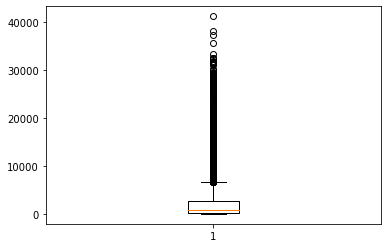

In [ ]:
data['totalDistance'] = (data['walkDistance'] + data['rideDistance'] + data['swimDistance'])
plt.boxplot(data['totalDistance'])
plt.show()

#### Using this metric we can clearly see total distance traveled max of around 8000 meters before becoming an outlier. Now this is no straightforward metric as you must consider time alive and how long you had to move. This boxplot has made it clear the need for this metric to involve match duration.

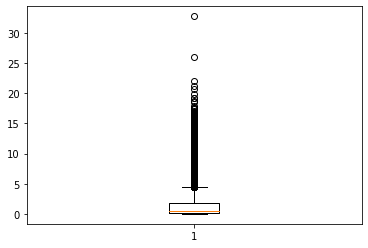

In [ ]:
data['speedMetric'] = data['totalDistance']/data['matchDuration']
plt.boxplot(data['speedMetric'])
plt.title('Catch for speed cheat')
plt.show()

#### This metric works well because it takes into account players who moved enormous amounts of space in a very short game and doesn't as heavily penalize those who just had very long matches, this is important since matches can last upwards of 30 min and if a player moved at a consistent speed for nearly the entire match they could move 12,000 meters just on foot. Given the diagram it is very clear to see some players in this dataset were using the speed hack.
## Aim Bot Hack

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'totalDistance',
       'speedMetric'],
      dtype='object')

In [ ]:
data['headshotPerc'] = data['headshotKills']/data['kills']
data['headshotPerc'] = data['headshotPerc'].fillna(0)

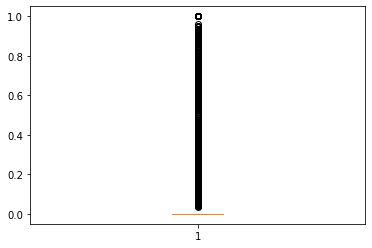

In [ ]:
plt.boxplot(data['headshotPerc'])
plt.show()

#### Now this boxplot shows what the average percentage of headshots to kills ratio. This will help us weed out who is performing too many headshots in comparison to others. As we can see right off there are many players who scored a 1.0 or a perfect headshot ratio. This is either an error due to some people getting one kill and one headshot kill before dying immediately after. The other possibility is a player who got only headshots due to aimbot. This metric would be useful in having a computationally expensive image detection model only check on those players who score above a certain percentage on our metric saving the company computation time and money. I would think any percentage over 80-90% and scored more than 3 kills would be suspicous enough to flag for more computationally expensive means.